# Банки — Сегментация пользователей по потреблению. Исследование оттока клиентов регионального банка «Метанпром»

Презентация к проекту:  https://disk.yandex.ru/d/CMTbhqvphhi7zw

Дашборд к проекту: https://public.tableau.com/app/profile/tata2598/viz/Mikhailova_TbankMetanProm/Dashboard1#2

На основании данных о клиентах банка "Метанпром" необходимо произвести сегментацию пользователей по количеству потребляемых продуктов для последующей оценки оттока.

**Цель:** Снижение уровня оттока клиентов.

**Ход работы:**
1.	*Ознакомление с данными*

    - 1.1 Подключение библиотек
    - 1.2 Изучение общей информации о датафрейме (структура, типы данных и т.д.).
    
    
2.  *Предобработка данных*
    - 2.1  Замена наименования столбцов (при необходимости).
    - 2.2  Проверка на наличие пропусков в столбцах. Работа с пропусками.
    - 2.3  Проверка на наличие дубликатов (явные/неявные).
    - 2.4  Замена типа данных (при необходимости).
    - 2.5  Проверка значений на аномалии и выбросы.
    - 2.6  Кодировка категориальных переменных.

    
3.  *Исследование данных*
    - 3.1 Рассмотрение распределения признаков пользователей, выявление закономерностей и их влияние на отток.


4. *Сегментация пользователей по количеству продуктов*
    - 4.1  Разделение пользователей на сегменты внутри признака.
    - 4.2  Рассмотрение оттока пользователей в полученных сегментах.


5. *Статистическое исследование*
    - 5.2  Формулирование гипотез Н0 и Н1 и выбор стат.критерия.
    - 5.3  Проверка гипотез Н0 и Н1.
    
    
6. *Выводы по исследованию и рекомендации.*
    - 6.1 Краткое описание хода исследования.
    - 6.2 Описание полученных сегментов.
    - 6.3 Рекомендации по сокращению оттока пользователей.


## 1.	Ознакомление с данными

### 1.1 Подключение библиотек

In [53]:
import pandas as pd # подключение библиотек
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import numpy as np
import math as mth
import plotly.express as px
from datetime import datetime as dt
from scipy import stats as st
from plotly import graph_objects as go

In [54]:
#подгрузка файлов с данными
try:
    data_bank = pd.read_csv('C:/Users/Tata_P/Downloads/bank_dataset.csv', sep = ',')
except:
    data_bank = pd.read_csv('/datasets/bank_dataset.csv', sep = ',')
warnings.filterwarnings('ignore')

### 1.2 Изучение общей информации о датафрейме

In [55]:
data_bank.head(10) # вывод DF для ознакомления с данными и структурой

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


Таблица `data_bank` содержит столбцы с основной информацией о клиентах банка "Метанпром": 
- `userid` — идентификатор пользователя;
- `score` —  баллы кредитного скоринга;
- `City` — город;
- `Gender` — пол;
- `Age` — возраст;
- `Objects` — количество объектов в собственности;
- `Balance` — баланс на счёте;
- `Products` — количество продуктов, которыми пользуется клиент;
- `CreditCard` — есть ли кредитная карта;
- `Loyalty` — показатель активности клиента;
- `estimated_salary` — заработная плата клиента;
- `Churn` — ушёл клиент или нет.

Из технического задания, представленного от банка "Метанпром", известно, что база данных содержит информацию о клиентах из Ярославля и областных городов - Ростов Великий и Рыбинск.

In [56]:
data_bank.info() #информация о DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


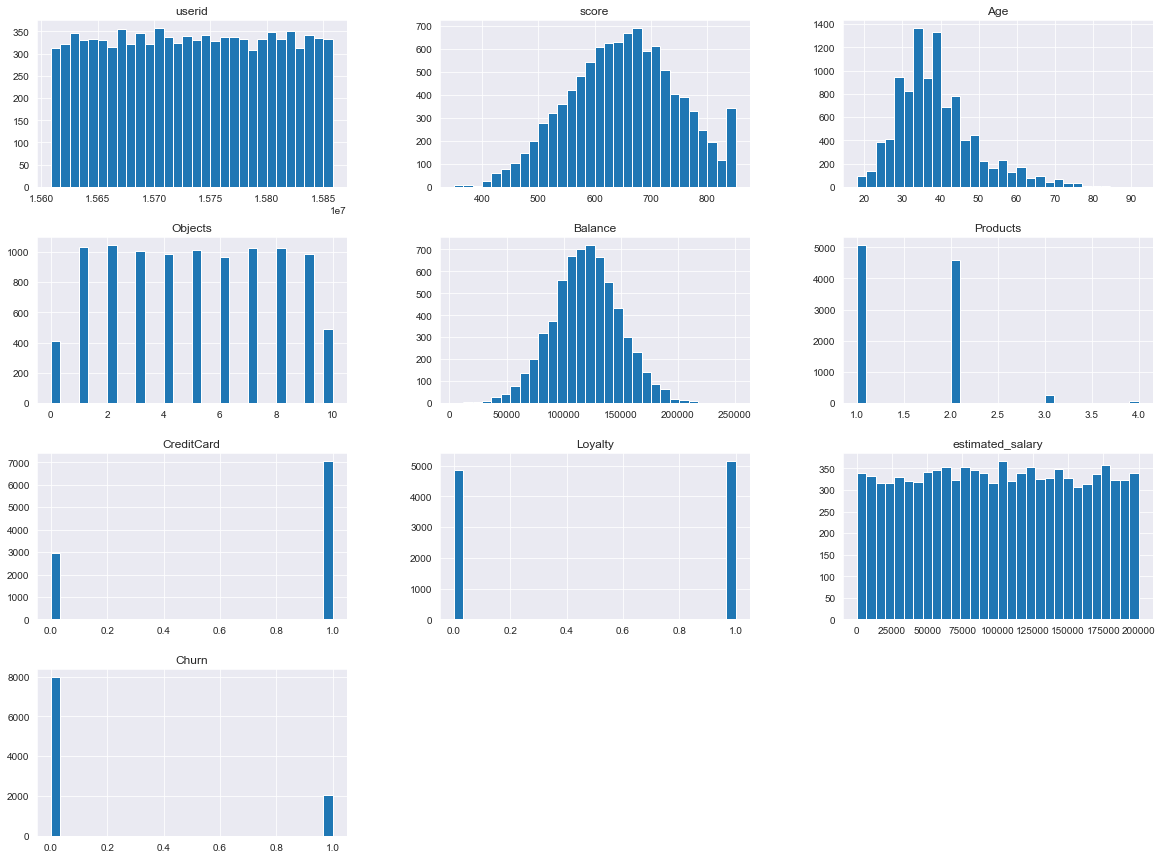

In [57]:
data_bank.hist(figsize=(20, 15), bins=30); 
# вывод гистограмм по каждому столбцу для первичной оценки характера распределения значений

In [58]:
data_bank.describe(include = "all")

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.573368e+07,650.528800,NaN,NaN,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,NaN,NaN,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,NaN,NaN,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,NaN,NaN,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,NaN,NaN,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000


**Вывод**

При первичном ознакомлении со структурой настоящего DF можно сделать выводы:
- типы данных для каждого столбца соответствуют содержимому.
- количество строк 10000.
- в столбце `Balance` существуют пропуски.
- основные значения имеют нормальное распределение

## 2.  Предобработка данных

### 2.1  Замена наименования столбцов

После ознакомления с данными принято решение сразу привести наименования столбцов к нижнему регистру для единого стиля и удобства работы.

In [59]:
data_bank.columns = data_bank.columns.str.lower() # перевод в нижний регистр
data_bank = data_bank.rename(columns = {'userid':'user_id', 'сreditсard':'credit_card'}) # перевод в "змеиный" стиль
print(data_bank.columns.values) # проверка замены наименований

['user_id' 'score' 'city' 'gender' 'age' 'objects' 'balance' 'products'
 'creditcard' 'loyalty' 'estimated_salary' 'churn']


### 2.2  Проверка на наличие пропусков в столбцах. Работа с пропусками

При первичном ознакомлении с данными базы стало понятно, что в столбце `balance` большое количество пропусков. Необходимо их определить.

In [60]:
data_bank.isna().sum() #количество пропусков

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [61]:
print((data_bank.isna().sum().sort_values(ascending=False)[0])*100/len(data_bank), '%')
# расчет количества пропусков в % для столбца с балансом

36.17 %


В столбце `balance` 36% значений это пропуски. Такое количество пропусков при удалении или замене, например, на медиану, повлечет за собой смещение распределения в область медианного значения. 

Исследование пропусков в столбце `balance` целесообразно провести после проведения последующих этапов предобработки, когда из DF будут исключены дубликаты и выбросы/аномалии.

### 2.3  Проверка на наличие дубликатов (явные/неявные).

In [62]:
print('Количество дублирующихся строк:', data_bank.duplicated().sum()) # количество дубикатов
#print('Процент дубликатов:', data_bank.duplicated().sum()/len(data_bank['balance'])*100,'%') # вывод процента пропусков относительного всего DF 

Количество дублирующихся строк: 0


Поверка DF на явные дубликаты показала, что дублирующих друг друга строк в DF нет.

Помимо полностью одинаковых строк, необходимо проверить уникальность id пользователей из столбца `user_id`. В случае отсутствия повторных id, количество уникальных id должно соответствовать количеству строк.

Дополнительно стоит рассмотреть некоторое столбцы на уникальность, чтобы выявить ошибки, неточности записей. Основные столбцы, на которые стоит обратить внимание: `age`, `objects`, `products`, `credit_card`, `loyalty`, `churn`.

In [63]:
columns = data_bank.columns.values # список колонок DF
for i, col in enumerate(columns): # запускаем цикл по заданному выше списку с помощью enumerate
    print(data_bank[col].sort_values().unique())
print()
print('Количество уникальник пользователей:', data_bank['user_id'].nunique()) # проверка количества уникальных пользователей

[15608437 15608442 15608450 ... 15858392 15858396 15858426]
[350 351 358 359 363 365 367 373 376 382 383 386 395 399 401 404 405 407
 408 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426
 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444
 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462
 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480
 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498
 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516
 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534
 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552
 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570
 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588
 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606
 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622

Просмотрев уникальные значения каждого интересующего столбца, можно сделать вывод, что данные записаны корректно. Все эти значения соответствуют представленной информации от заказчика. Все id пользователей уникальны и пересечений нет.

### 2.4  Проверка значений на аномалии и выбросы

При первичном ознакомлении с DF было оценено распределение значений. Рассмотрим более детально некоторые столбцы.

In [64]:
data_bank.describe().round()

,user_id,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,10000.0,10000.0,10000.0,10000.0,6383.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,15733677.0,651.0,39.0,5.0,119827.0,2.0,1.0,1.0,100090.0,0.0
std,71936.0,97.0,10.0,3.0,30095.0,1.0,0.0,0.0,57510.0,0.0
min,15608437.0,350.0,18.0,0.0,3769.0,1.0,0.0,0.0,12.0,0.0
25%,15671264.0,584.0,32.0,3.0,100182.0,1.0,0.0,0.0,51002.0,0.0
50%,15733474.0,652.0,37.0,5.0,119840.0,1.0,1.0,1.0,100194.0,0.0
75%,15795970.0,718.0,44.0,7.0,139512.0,2.0,1.0,1.0,149388.0,0.0
max,15858426.0,850.0,92.0,10.0,250898.0,4.0,1.0,1.0,199992.0,1.0


Рассмотрим только столбцы с переменной типа float64

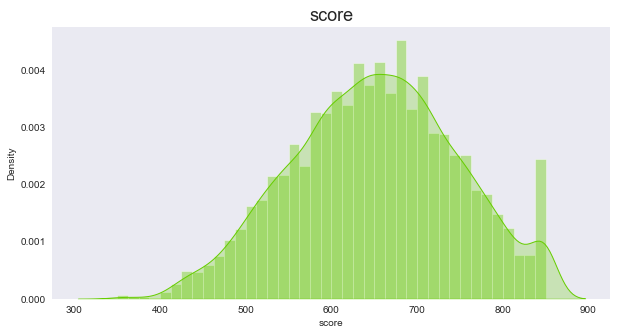

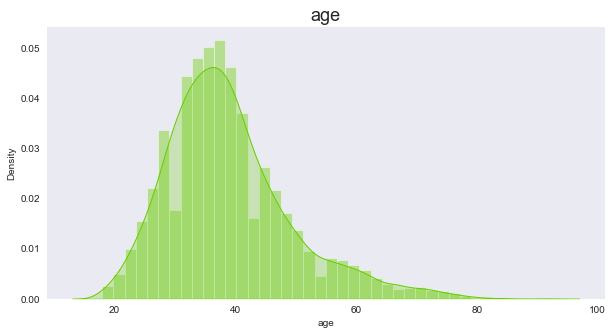

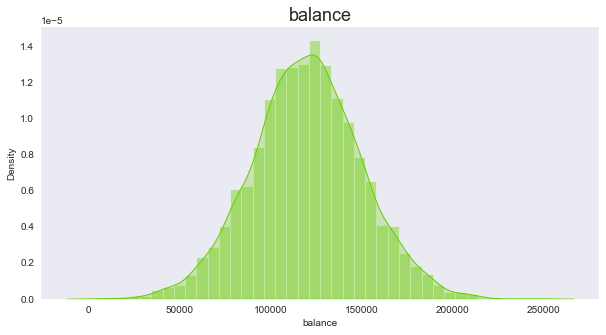

In [65]:
columns = ['score', 'age', 'balance'] #data_bank.columns.values # список колонок DF
for i, col in enumerate(columns): # запускаем цикл по заданному выше списку с помощью enumerate
    plt.figure(figsize=(10, 5))
    plt.title( col, fontsize=18)
    sns.despine(left=True)
    sns.distplot(data_bank[col], hist=True, kde_kws={"shade": True}, bins=40, color="#66cd00")
    plt.show()

print()

Столбец с баллами кредитного скоринга `score` имеет нормальное распределение с некоторыми локальными пиками. 
Кредитный скоринг - система оценки кредитоспособности клиента. Данный рейтинг рассчитывается банком с помощью собственных алгоритмов и является исключительно внутренним рейтингом пользователей. Для дальнейшего исследования столбец `score` будем считать второстепенным признаком. Поэтому принято решение оставить данный столбец без изменения.

Столбец, содержащий возраст клиентов `age`, имеет нормальное распределение с некоторыми "провалами". В соответствии с `describe` средний возраст клиента банка "Метанпром" 39 лет, при этом 25% от всех пользователей это люди старше 44 лет. 
В данном исследовании  все пользователи будут рассмотрены в рамках объединенных групп, поэтому для достоверного результата и полной картины о взаимодействии клиентов с банком, принято решение не считать данный разброс выбросами и оставить столбец `age` без изменений.

Столбец с балансом `balance`, не смотря на большое количество пропусков, имеет характер нормального распределения. Возможно появление пропусков является следствием технической ошибки. Но для выяснения причины их появления и принятие решения об удалении или их замены, необходимо дополнительно изучить строки с пропусками. 

### 2.5  Кодировка категориальных переменных

Переведем категориальные признаки, такие как город и пол, в численные значения

In [66]:
data_bank['city_old'] = data_bank['city']
data_bank['gender_old'] = data_bank['gender']
data_bank= pd.get_dummies(data_bank, columns=['city', 'gender'])
data_bank.head()

,user_id,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_old,gender_old,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,Ярославль,Ж,0,0,1,1,0
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,Рыбинск,Ж,0,1,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,Ярославль,Ж,0,0,1,1,0
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,Ярославль,Ж,0,0,1,1,0
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,Рыбинск,Ж,0,1,0,1,0


### 2.6  Изучение пропусков в столбце `balance`

Необходимо рассмотреть клиентов, у которых нет данных о балансе, чтобы понять причину их отсутствия.

In [67]:
data_bank.loc[data_bank.isnull().any(axis=1)].head() # выделение строк DF, содержащиих пропуски

,user_id,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_old,gender_old,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,Ярославль,Ж,0,0,1,1,0
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,Ярославль,Ж,0,0,1,1,0
6,15635267,822,50,7,NaN,2,1,1,10062.80,0,Ярославль,М,0,0,1,0,1
11,15779909,497,24,3,NaN,2,1,0,76390.01,0,Рыбинск,М,0,1,0,0,1
12,15675000,476,34,10,NaN,2,1,0,26260.98,0,Ярославль,Ж,0,0,1,1,0


In [68]:
data_bank[data_bank['balance'].isna()].describe()

,user_id,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
count,3.617000e+03,3617.000000,3617.000000,3617.000000,0.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.0,3617.000000,3617.000000,3617.000000,3617.000000
mean,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236,0.0,0.331490,0.668510,0.457285,0.542715
std,7.194749e+04,96.158798,10.492002,2.860781,NaN,0.496455,0.450704,0.499751,57730.828955,0.345195,0.0,0.470814,0.470814,0.498241,0.498241
min,1.560844e+07,350.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,90.070000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.567226e+07,583.000000,31.000000,3.000000,NaN,1.000000,0.000000,0.000000,49506.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.573608e+07,651.000000,37.000000,5.000000,NaN,2.000000,1.000000,1.000000,98618.790000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000
75%,1.579629e+07,717.000000,43.000000,7.000000,NaN,2.000000,1.000000,1.000000,148330.970000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000
max,1.585810e+07,850.000000,88.000000,10.000000,NaN,4.000000,1.000000,1.000000,199992.480000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


Предварительно можно сказать:
- все пользователи являются жителями Ярославля и Рыбинска
- возраст около 38 лет
- мужчина или женщина в равной степени
- имеют 2 продукта банка 
- средний доход около 100 тысяч рублей

Так как отток клиентов банка будет рассмотрен в зависимости от количества продуктов, то и пропуски целесообразно рассмотреть  именно по количеству продуктов.

In [69]:
display(data_bank[data_bank['balance'].isna()].groupby('products')['products'].count())

products
1     905
2    2600
3      98
4      14
Name: products, dtype: int64

В каждой из 4 групп, сформированных по количеству продуктов, есть пропуски. Больше всего пропусков в группе с двумя продуктами, так как самыми популярными продуктами банка являются дебетовые и кредитные карты. К ним дополнительно можно подключить страховку и мобильные платежи, тем самым объясняется 3-4 продукта банка у одного клиента. Причин, по которым образовались пропуски может быть несколько:
1. Техническая ошибка при выгрузке данных. В этом случае пропуски можно заменить на среднее значение по столбцу, чтобы не изменить нормальное распределение.
2. Возможно, пропуски в балансе связаны с новыми клиентами банки, информация по которым не успела обноситься в момент выгрузки.

В связи с вышесказанным, принято решения оставить пропуски, так как заменить их не чем.

**Вывод:** При проведении предобработки данных не выявлено дубликатов и выбросов. Были найдены пропуски в столбце `balance`, но решено не проводить их замену на конкретные значения. 

Предобработка данных закончена, данные готовы к проведению дальнейшего анализа.

## 3.  Исследование данных

### 3.1 Рассмотрение распределения признаков пользователей, выявление закономерностей и их влияние на отток

Перед началом анализа определит процент оттока в целом по базе

In [70]:
print('Процент клиентов банка:', '{0:.2%}'.format((data_bank.query('churn == 0')['churn'].count())/(data_bank['churn'].count())))
print('Процент оттока клиентов:', '{0:.2%}'.format((data_bank.query('churn == 1')['churn'].count())/(data_bank['churn'].count())))

Процент клиентов банка: 79.63%
Процент оттока клиентов: 20.37%


In [71]:
data_filtr=data_bank.groupby('churn')['user_id'].count().reset_index()
display(data_filtr)
# поспроение круговой диаграммы для быстрого визуьного восприятия лидирующих категорий
fig = go.Figure(data=[go.Pie(labels= data_filtr['churn'], # указываем значения, которые появятся на метках сегментов
                             values= data_filtr['user_id'], # указываем данные, которые отобразятся на графике
                             pull = [0, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Соотношение клиентов банка', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=500,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Признак наличия клиента',
                                    showarrow=False)])
fig.show() # выводим график

,churn,user_id
0,0,7963
1,1,2037


Процент оттока составляет 20% от всех клиентов банка. Это значит, что каждый пятый пользователь, вероятнее всего, неудовлетворен качеством предоставляемых услуг. 

In [72]:
data_bank_churn = data_bank.query('churn == 1')
data_bank_churn.describe()

,user_id,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
count,2.037000e+03,2037.000000,2037.000000,2037.000000,1537.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,1.573279e+07,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531,1.0,0.399607,0.202749,0.397644,0.559156,0.440844
std,7.269262e+04,100.321503,9.761562,2.936106,30555.192802,0.801521,0.458776,0.480358,57912.418071,0.0,0.489938,0.402146,0.489531,0.496610,0.496610
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.567010e+07,578.000000,38.000000,2.000000,103700.690000,1.000000,0.000000,0.000000,51907.720000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.573170e+07,646.000000,45.000000,5.000000,119948.090000,1.000000,1.000000,0.000000,102460.840000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.579583e+07,716.000000,51.000000,8.000000,137986.580000,2.000000,1.000000,1.000000,152422.910000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.585839e+07,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


Рассмотрев описание "отточных" пользователей с помощью метода `describe()` можно сказать, что:
- возраст около 45 лет
- женщин в оттоке на 11% больше, чем мужчин
- большая часть клиентов имеют 1 продукт 
- средний доход около 101 тысячи рублей

С помощью матрицы корреляции можно оценить какие признаки больше всего будет влиять на результат.

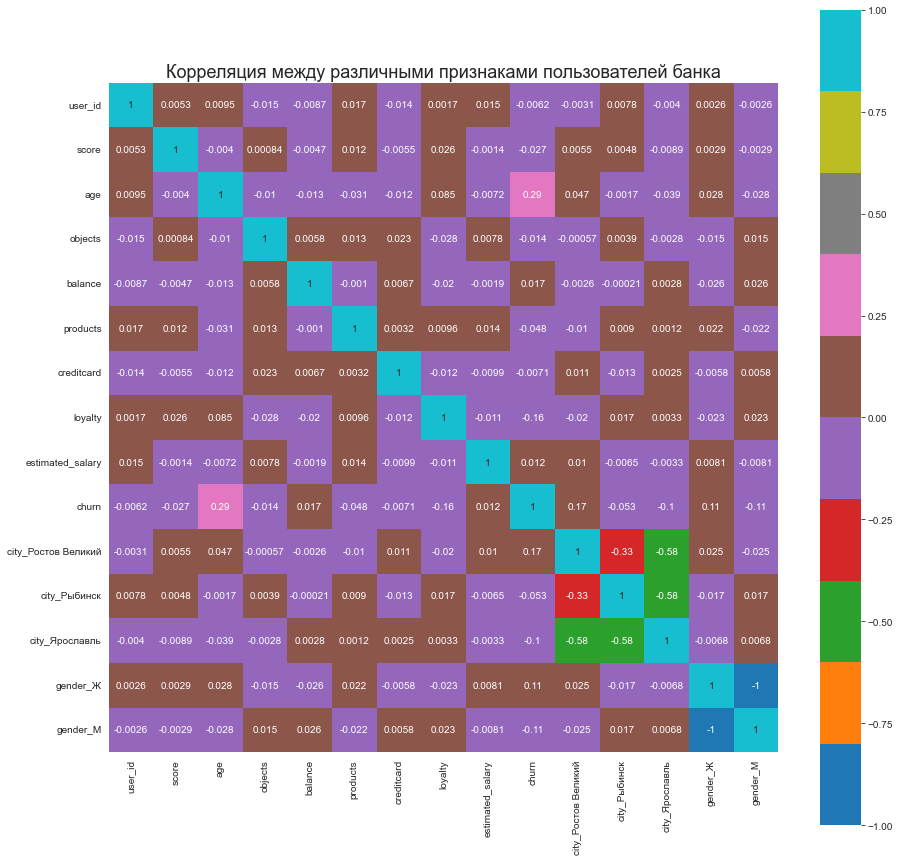

In [73]:
correlation = data_bank.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='tab10')

plt.title('Корреляция между различными признаками пользователей банка', fontsize=18)
#sns.despine(left=True, right = True)
plt.show()

Рассмотрев матрицу корреляций, можно сказать, что возраст `age` имеет наибольшее влияние на отток, хотя само значение в 0,29 слабоположительное. Еще одно наблюдение, что есть положительная корреляция в столбцах, образованных после кодирования категориальных признаков: Это клиенты женского пола и клиенты из Ростова Великого.
Однако, корреляция между оттоком пользователей и количеством продуктов отрицательная. 

Перед началом рассмотрения признаков, составим функцию визуализации

In [74]:
#функция для выделения признака и построения графиков
def category_graph (data_bank, categorize):
        data_category = data_bank.groupby(categorize).agg({'churn':['count','sum', 'mean']})
        # расчет оттока клиентов, взавсисмости признака
        data_category.columns = data_category.columns.droplevel(0) # сброс 0 уровня колонок
        data_category = data_category.reset_index().sort_values(by = 'mean', ascending = False) # сброс индексации + сортировка
        data_category['mean'] = (data_category['mean']*100).round(1) # перевод в проценты оттока
        data_category['mean_null'] = 100-data_category['mean'].round(1)# процент оставшихся клиентов
        display(data_category) # вывод получившейся таблицы на экран

        plt.subplots(figsize = (10, 5))
        ax = sns.barplot( x = data_category[categorize], y = data_category['mean']);
        # построение столбчатой диаграммы 
        plt.title(f'Отток клиентов в зависимости признака {categorize}',  fontsize=18)
        plt.xticks(rotation=0,  fontsize=12)
        plt.yticks(rotation=0,  fontsize=12)
        plt.xlabel('Категория', fontsize=15)
        plt.ylabel ('Процент оттока', fontsize=15)
        plt.grid(True);

In [75]:
#функция для выделения признака и построения графиков
def category_graph_all (sign):
    data_filtr=data_bank.groupby(sign)['user_id'].count().reset_index()
    display(data_filtr)
# поспроение круговой диаграммы для быстрого визуьного восприятия лидирующих категорий
    fig = go.Figure(data=[go.Pie(labels= data_filtr[sign], # указываем значения, которые появятся на метках сегментов
                             values= data_filtr['user_id'], # указываем данные, которые отобразятся на графике
                             pull = [0, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
    fig.update_layout(title='Соотношение клиентов банка по признаку', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=500,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Категория клиента',
                                    showarrow=False)])
    fig.show() # выводим график

#### 3.1.1 Возраст клиента

Так как возраст имеет самое большое влияние на отток, то разделим пользователей на возрастные категории. Разделение будет проведено с учетом среднестатистических целей и предполагаемых интересов клиентов к банковским продуктам.

- от 18 лет до 23 лет - обучающиеся, которые могут использовать, например, дебетовые карты для получения стипендии;
- от 24 лет до 30 лет - молодые люди, которые получили первую работу и планируют заводить семью, покупку дома и нацеленные на увеличение доходов;
- от 31 года до 45 лет - взрослые люди, со сложившейся карьерой, но имеющие ограничения в финансах, из-за обеспечения содержания семьи, дополнительного образования детей и улучшения жилищных условий.
- от 46 лет до 65 - зрелые люди, у которых вероятен рост доходов из-за освобождения от финансовых обязательств в виде всевозможных кредитов. Люди, которые начинают планирование пенсионного обеспечения.
- от 66 лет - пенсионеры. Люди имеют некоторый накопленный капитал, и основная цель обеспечить его сохранность.

In [76]:
def categorize_age (age): # функция для разненесения клиентов по возрастным категориям
    try:
        if 18 <= age <= 23:
            return 'обучающиеся'
        elif 24 <= age <= 30:
            return 'молодые люди'
        elif 31 <= age <= 45:
            return 'взрослые люди'
        elif 46 <= age <= 65:
            return 'зрелые люди'
        elif age >= 66:
            return 'пенсионеры'
    except:
        pass

In [77]:
data_bank['age_category'] = data_bank['age'].apply(categorize_age) # новый стобце в DF с опреденением возрастной категории

Посмотрим на распределение получившихся возрастных категорий внутри всей выборки

In [78]:
category_graph_all('age_category') 

,age_category,user_id
0,взрослые люди,5921
1,зрелые люди,1847
2,молодые люди,1643
3,обучающиеся,325
4,пенсионеры,264


Большая часть клиентов вошла в возрастную категорию "взрослые люди" - 59%.

Оценим распредение оттока в возрастных категориях по количеству продуктов

In [79]:
data=data_bank.pivot_table(index=['age_category'], values=['churn'], aggfunc='sum').sort_values(by='churn', ascending=False).rename(columns={'churn':'sum'})
data= data.reset_index() # сброс индексации

data_age = data_bank.pivot_table(index = 'age_category', columns='products', values= 'churn', aggfunc='sum')
data_age = data_age.reset_index() # сброс индексации
data_age = data.merge(data_age, on='age_category', how='left')

display(data_age.head(15))

,age_category,sum,1,2,3,4
0,взрослые люди,932,629.0,167.0,107.0,29.0
1,зрелые люди,922,659.0,144.0,91.0,28.0
2,молодые люди,122,82.0,22.0,16.0,2.0
3,пенсионеры,35,22.0,9.0,3.0,1.0
4,обучающиеся,26,17.0,6.0,3.0,NaN


По полученной таблице видно, что обучающиеся не используют более 3 продуктов.

Распределение оттока внутри каждой возрастной категории

,age_category,count,sum,mean,mean_null
1,зрелые люди,1847,922,49.9,50.1
0,взрослые люди,5921,932,15.7,84.3
4,пенсионеры,264,35,13.3,86.7
3,обучающиеся,325,26,8.0,92.0
2,молодые люди,1643,122,7.4,92.6


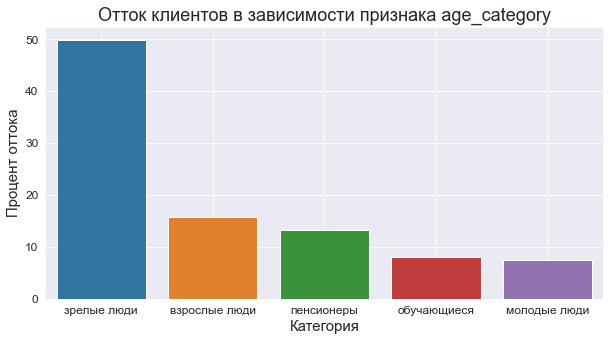

In [80]:
category_graph(data_bank, 'age_category') # визуализация

Анализ возрастных групп показал, что самый высокий отток клиентов находится в категории "зрелые люди" от 46 лет до 65 лет. Там отток около 50% от общего числа пользователей этой категории. Далее, 16% оттока у категории "взрослые люди".
Но при этом, фактическое количество людей, попавших в отток, в категории "зрелые люди" больше всего на 10 человек, чем в категории "взрослые люди". В каждой из этих категории отток порядка тысячи человек.

#### 3.1.2 Пол клиента

По матрице корреляции была выявлена и зависимость отток и пола. Проведем разделение по полу и посмотрим кто больше подвержен оттоку: мужчины или женщины.

Посмотрим на распределение получившихся возрастных категорий внутри всей выборки

In [81]:
category_graph_all('gender_old') 

,gender_old,user_id
0,Ж,4543
1,М,5457


Соотношение женщин и мужчин в выборке примерно одинаково.

Оценим распредение оттока по гендерному признаку и по количеству продуктов

In [82]:
data=data_bank.pivot_table(index=['gender_old'], values=['churn'], aggfunc='sum').sort_values(by='churn', ascending=False).rename(columns={'churn':'sum'})
data= data.reset_index() # сброс индексации

data_gender = data_bank.pivot_table(index = 'gender_old', columns='products', values= 'churn', aggfunc='sum')
data_gender = data_gender.reset_index() # сброс индексации
data_gender = data.merge(data_gender, on='gender_old', how='left')

display(data_gender.head(15))

,gender_old,sum,1,2,3,4
0,Ж,1139,762,210,129,38
1,М,898,647,138,91,22


Распределение оттока внутри каждой группы

,gender_old,count,sum,mean,mean_null
0,Ж,4543,1139,25.1,74.9
1,М,5457,898,16.5,83.5


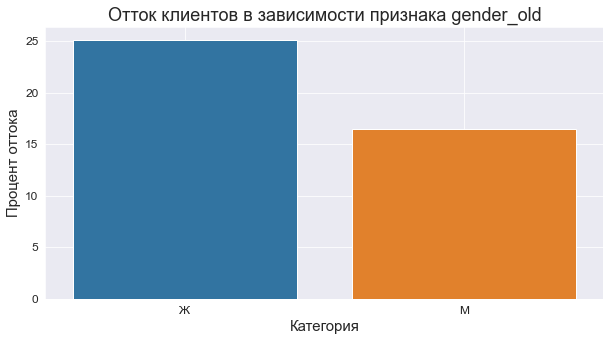

In [83]:
category_graph(data_bank, 'gender_old') # визуализация

На основании полученного графика можно сделать вывод:
- что женщины больше подвержены оттоку чем мужчины. Разница между ними 9%.
- 25% из всех пользователей женского пола отказываются от услуг банка. 

#### 3.1.3 Местоположение (город) клиента.

Еще один признак, по которому замечена положительная корреляция с оттоком - город.

Посмотрим на распределение клиентов по городам внутри всей выборки

In [84]:
category_graph_all('city_old') 

,city_old,user_id
0,Ростов Великий,2509
1,Рыбинск,2477
2,Ярославль,5014


Ровно 50% от всех клиентов банка находятся в Ярославле. В оставшихся городах число пользоватей отличается на 0.3%

Оценим распредение оттока в городах по количеству продуктов

In [85]:
data=data_bank.pivot_table(index=['city_old'], values=['churn'], aggfunc='sum').sort_values(by='churn', ascending=False).rename(columns={'churn':'sum'})
data= data.reset_index() # сброс индексации

data_city = data_bank.pivot_table(index = 'city_old', columns='products', values= 'churn', aggfunc='sum')
data_city = data_city.reset_index() # сброс индексации
data_city = data.merge(data_city, on='city_old', how='left')

display(data_city.head(15))

,city_old,sum,1,2,3,4
0,Ростов Великий,814,578,126,86,24
1,Ярославль,810,564,135,82,29
2,Рыбинск,413,267,87,52,7


Выше всего отток в Ростове Великом. В Рыбенске число ушедших клиентов в 2 раза меньше, чтом Ростове Великом, при том, что их общее число клиентов практически одинаково.

Распределение оттока внутри каждой группы

,city_old,count,sum,mean,mean_null
0,Ростов Великий,2509,814,32.4,67.6
1,Рыбинск,2477,413,16.7,83.3
2,Ярославль,5014,810,16.2,83.8


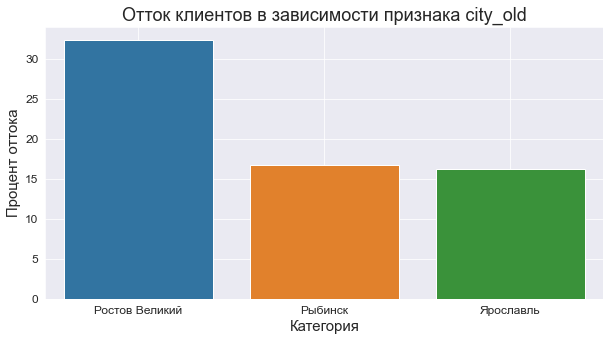

In [86]:
category_graph(data_bank, 'city_old') # визуализация

На основании построенной диаграммы зависимости оттока от города, видно, что в Ростове Великом отток клиентов больше всего - это 32% от всех пользователей из Ростова Великого. В остальных городах процент ушедших клиентов практически одинаков - около 16%

#### 3.1.3 Количество продуктов у клиента банка.

Задачей исследования является анализ оттока клиентов регионального банка при сегментировании их по количеству потребляемых продуктов.

Посмотрим на распределение клиентов по количеству внутри всей выборки

In [87]:
category_graph_all('products') 

,products,user_id
0,1,5084
1,2,4590
2,3,266
3,4,60


Основная масса клиентов использует только 1 или 2 продукта

Оценим распредение оттока в городах по количеству продуктов

,products,count,sum,mean,mean_null
3,4,60,60,100.0,0.0
2,3,266,220,82.7,17.3
0,1,5084,1409,27.7,72.3
1,2,4590,348,7.6,92.4


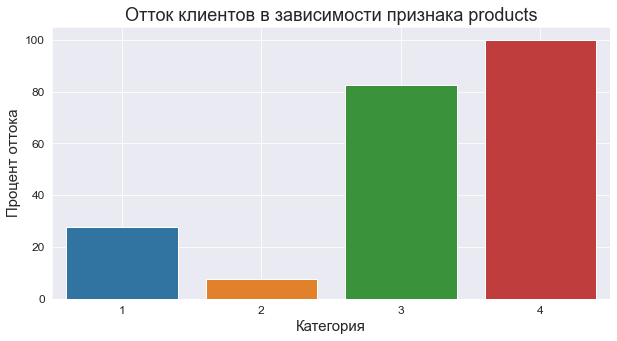

In [88]:
category_graph(data_bank, 'products') # визуализация

Расчет оттока при разделении пользователей по количеству продуктов показал, что 100% отток у клиентов с четырьмя продуктами, почти 83% у тех, кто имеет три продукта банка. Самый слабый отток у людей с двумя продуктами. Но при этом и количество самих людей в группе с количеством 3 и 4 очень мало.

#### 3.1.3 Доход/заработная плата клиента.

Разделим пользователей на категории по доходу. 
- до 30 т. рублей - категория А;
- от 30 т. рублей до 50 т.рублей - категория В;
- от 50 т. рублей до 100 т.рублей - категория С.
- от 100 т. рублей - категория D

In [89]:
def categorize_estimated_salary(income):
    try:
        if 0 <= income <= 30000:
            return 'A'
        elif 30001 <= income <= 50000:
            return 'B'
        elif 50001 <= income <= 100000:
            return 'C'
        elif income >= 100001:
            return 'D'
    except:
        pass

In [90]:
data_bank['income_category'] = data_bank['estimated_salary'].apply(categorize_estimated_salary)

Посмотрим на распределение получившихся категорий по доходу внутри всей выборки

In [91]:
category_graph_all('income_category') 

,income_category,user_id
0,A,1478
1,B,975
2,C,2537
3,D,5010


Половина клиентов банка имеют доход более 100 тысяч рублей.

Распределение оттока внутри каждой группы

,income_category,count,sum,mean,mean_null
3,D,5010,1044,20.8,79.2
0,A,1478,302,20.4,79.6
2,C,2537,504,19.9,80.1
1,B,975,187,19.2,80.8


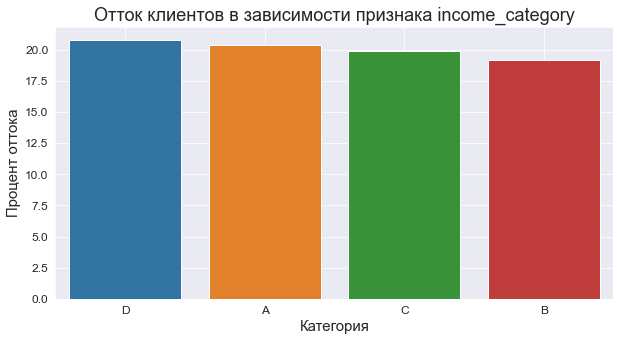

In [92]:
category_graph(data_bank, 'income_category') # визуализация

Между категориями заработных плат разницы в оттоках практически нет. Все в пределах 20% от общего числа клиентов внутри категории.

**Вывод:** С помощью матрицы корреляций оценены признаки. Матрица показала какие признаки наибольшим образом влияют на отток клиентов: возраст, пол и город, в частности женщины и пользователи из Ростова Великого. Дополнительно оценены оттоки при разделении на категории дохода и количества продуктов банка. Получены результаты:
- самый высокий отток клиентов в категории "зрелые люди" от 46 лет до 65 лет, Там отток около 50% от общего числа пользователей этой категории. Далее, 16% оттока у категории "взрослые люди". При этом в обеих группа отток почти по 1000 человек.
- больше всего оттоку подвержены женщины - 25% от всех женщин данного DF.
- в Ростове Великом отток клиентов больше всего - это 32% от всех пользователей из Ростова Великого. В остальных городах процент ушедших клиентов практически одинаков.
- при разделении пользователей по количеству продуктов видно, что 100% отток у клиентов с четырьмя продуктами, почти 83% у тех, кто имеет три продукта банка. При этом фактическое количество людей, имеющих 3 всего 60 человек, а с 4 - 220. Самый слабый отток у людей с двумя продуктами.
- разделение пользователей по заработной плате разницы в оттоках не показало. Все в пределах 20% от общего числа клиентов внутри категории.
 

## 4. Сегментация пользователей по количеству продуктов

### 4.1  Разделение пользователей на сегменты внутри признака

После изучения оттоков внутри каждого "интересного" признака, принято решение проводить сегментацию именно по ним, за исключением дохода.

Перед началом рассмотрения признаков, составим функцию составления сегмента и визуализации

In [93]:
# функция для разделения на сегменты и визуализация
def segment_graph (gender, age_category):
        data_segment = data_bank.query('gender_old == @gender  and age_category == @age_category') # формирование сегмента
        segment= data_segment.groupby(['products','city_old'], as_index=False)['churn'].mean() 
        segment['churn'] = (segment['churn']*100).round(1) # перевод в проценты
        display(segment)
        
        sns.set_style('dark') 
        plt.figure(figsize=(10, 5)) # назначаем размер графика
        sns.barplot(x='city_old', y='churn', data= segment, hue='products') # столбчатый график
        plt.title(f'Отток {gender} из категории {age_category} по продуктам в каждом городе', fontsize=18)
        plt.xlabel('Количество продуктов в каждом городе', fontsize=15)
        plt.ylabel('Процент оттока', fontsize=15)
        plt.xticks(rotation=0,  fontsize=12)
        plt.yticks(rotation=0,  fontsize=12)
        plt.legend(loc='center right', fontsize=10) # легенда
        plt.grid() # сетка
        plt.show()     

,products,city_old,churn
0,1,Ростов Великий,75.9
1,1,Рыбинск,47.9
2,1,Ярославль,64.4
3,2,Ростов Великий,43.4
4,2,Рыбинск,29.2
5,2,Ярославль,21.7
6,3,Ростов Великий,100.0
7,3,Рыбинск,100.0
8,3,Ярославль,100.0
9,4,Ростов Великий,100.0


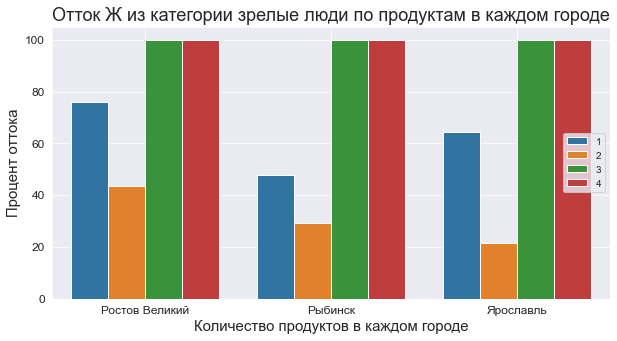

In [94]:
segment_graph('Ж', 'зрелые люди')

,products,city_old,churn
0,1,Ростов Великий,39.4
1,1,Рыбинск,22.6
2,1,Ярославль,20.7
3,2,Ростов Великий,12.0
4,2,Рыбинск,6.7
5,2,Ярославль,7.1
6,3,Ростов Великий,82.8
7,3,Рыбинск,70.0
8,3,Ярославль,87.0
9,4,Ростов Великий,100.0


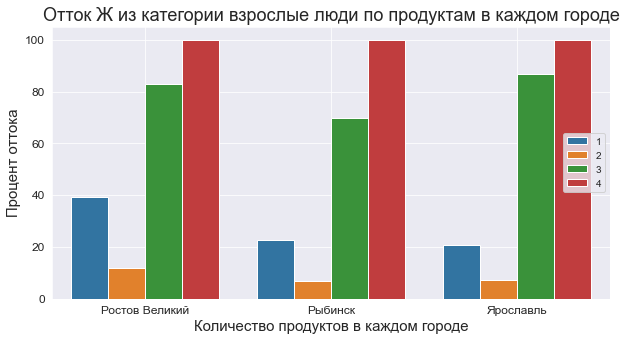

In [95]:
segment_graph('Ж', 'взрослые люди')

,products,city_old,churn
0,1,Ростов Великий,73.6
1,1,Рыбинск,42.5
2,1,Ярославль,47.5
3,2,Ростов Великий,27.7
4,2,Рыбинск,19.0
5,2,Ярославль,11.9
6,3,Ростов Великий,100.0
7,3,Рыбинск,100.0
8,3,Ярославль,94.4
9,4,Ростов Великий,100.0


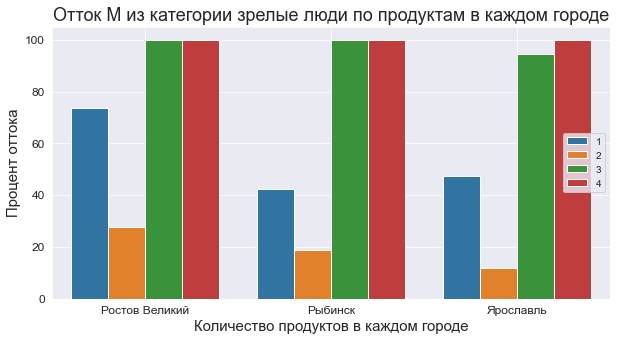

In [96]:
segment_graph('М', 'зрелые люди')

,products,city_old,churn
0,1,Ростов Великий,32.2
1,1,Рыбинск,13.4
2,1,Ярославль,13.5
3,2,Ростов Великий,6.9
4,2,Рыбинск,3.7
5,2,Ярославль,3.2
6,3,Ростов Великий,88.5
7,3,Рыбинск,71.4
8,3,Ярославль,66.7
9,4,Ростов Великий,100.0


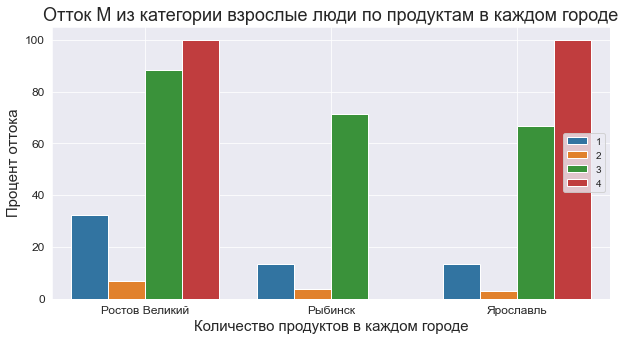

In [97]:
segment_graph('М', 'взрослые люди')

### 4.2  Рассмотрение оттока пользователей в полученных сегментах

Сегмент №1 Женщины из категории "зрелые люди", разделенные по городам и количеству продуктов

In [98]:
data_segment_1= data_bank.query('gender_old == "Ж" and age_category == "зрелые люди"') # формирование сегмента
segment_1= data_segment_1.groupby(['products','city_old'], as_index=False)['churn'].mean().rename(columns={'churn':'churn_G_ZL'})
segment_1['churn_G_ZL'] = (segment_1['churn_G_ZL']*100).round(1) # перевод в проценты

Сегмент №2 Женщины из категории "взрослые люди", разделенные по городам и количеству продуктов

In [99]:
data_segment_2= data_bank.query('gender_old == "Ж" and age_category == "взрослые люди"') # формирование сегмента
segment_2= data_segment_2.groupby(['products','city_old'], as_index=False)['churn'].mean().rename(columns={'churn':'churn_G_VL'})
segment_2['churn_G_VL'] = (segment_2['churn_G_VL']*100).round(1) # перевод в проценты

Сегмент №3 Мужчины из категории "взрослые люди", разделенные по городам и количеству продуктов

In [100]:
data_segment_3= data_bank.query('gender_old == "М" and age_category == "взрослые люди"') # формирование сегмента
segment_3= data_segment_3.groupby(['products','city_old'], as_index=False)['churn'].mean().rename(columns={'churn':'churn_M_VL'})
segment_3['churn_M_VL'] = (segment_3['churn_M_VL']*100).round(1) # перевод в проценты

Сегмент №4 Мужчины из категории "зрелые люди", разделенные по городам и количеству продуктов

In [101]:
data_segment_4= data_bank.query('gender_old == "М" and age_category == "зрелые люди"') # формирование сегмента
segment_4= data_segment_4.groupby(['products','city_old'], as_index=False)['churn'].mean().rename(columns={'churn':'churn_M_ZL'})
segment_4['churn_M_ZL'] = (segment_4['churn_M_ZL']*100).round(1) # перевод в проценты

Объединим все данные сегменты в одну таблицу

In [102]:
data_seg = segment_1.merge(segment_2, on=['products', 'city_old'], how='left')
data_seg = data_seg.merge(segment_3, on=['products', 'city_old'], how='left')
data_seg = data_seg.merge(segment_4, on=['products', 'city_old'], how='left')
display(data_seg)

,products,city_old,churn_G_ZL,churn_G_VL,churn_M_VL,churn_M_ZL
0,1,Ростов Великий,75.9,39.4,32.2,73.6
1,1,Рыбинск,47.9,22.6,13.4,42.5
2,1,Ярославль,64.4,20.7,13.5,47.5
3,2,Ростов Великий,43.4,12.0,6.9,27.7
4,2,Рыбинск,29.2,6.7,3.7,19.0
5,2,Ярославль,21.7,7.1,3.2,11.9
6,3,Ростов Великий,100.0,82.8,88.5,100.0
7,3,Рыбинск,100.0,70.0,71.4,100.0
8,3,Ярославль,100.0,87.0,66.7,94.4
9,4,Ростов Великий,100.0,100.0,100.0,100.0


По получившейся объединённой таблице можно сказать:
- больший отток с одним продуктом: мужчины и женщины от 46 до 65 лет из Ростова Великого (разница между М и Ж 2%);
- больший отток с двумя продуктами: женщины от 46 до 65 лет из Ростова Великого;
- больший отток с тремя продуктами: самые провальные группы. Отток самый высокий именно по этим группам. Меньше всех (67%) оттоку подвержены мужчины от 31 до 45 лет в Ярославле. 

## 5. Статистическое исследование

### 5.2  Формулирование гипотез Н0 и Н1 и выбор стат.критерия

В ходе исследования необходимо проверить две гипотезы.

Так как при сегментировании не учитывался доход/заработная плата клиентов, как влияющий на отток фактор, то гипотезы проверим именно по этому признаку.

**Гипотезы №1:** Различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

- Нулевая гипотеза: **Н0: Средний доход (estimated_salary) пользователей с одним продуктом = Средний доход (estimated_salary) пользователей с двумя продуктами**
- Альтернативная гипотеза: **Н1: Средний доход (estimated_salary) пользователей с одним продуктом ≠ Средний доход (estimated_salary) пользователей с двумя продуктами**

Уровень значимости - 0.05.


**Гипотезы №2:** Различия дохода между оставшимися и ушедшими клиентами.
- Нулевая гипотеза: **Н0: Средний доход (estimated_salary) оставшихся клиентов банка = Средний доход (estimated_salary) ушедших клиентов**
- Альтернативная гипотеза: **Н1: Средний доход (estimated_salary) оставшихся клиентов банка ≠ Средний доход (estimated_salary) ушедших клиентов**

Уровень значимости - 0.05.

Так как, все проверяемые гипотезы о равенстве средних двух генеральных совокупностей, независящих друг от друга, являются двухсторонними, то в качестве проверки выбран t-тест.

### 5.3  Проверка гипотез Н0 и Н1    

Проверка гипотезы №1

In [103]:
results = st.ttest_ind(data_bank.query('products == 1')['estimated_salary'],\
                       data_bank.query('products == 2')['estimated_salary'],\
                       equal_var = False)
# results = вызов метода для проверки гипотезы

alpha = .05# alpha = задайте значение уровня значимости

print(results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:# сравните полученный и критический уровени значимости
    # и проверьте, что выборочное среднее с нужной стороны от interested_value):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")# условный оператор с выводом строки с ответом

0.4106493940071987
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, значит вероятность встретить клиентов с одинаковым доходом - 41%

Проверка гипотезы №2

In [104]:
results = st.ttest_ind(data_bank.query('churn == 0')['estimated_salary'],\
                       data_bank.query('churn == 1')['estimated_salary'],\
                       equal_var = False)
# results = вызов метода для проверки гипотезы

alpha = .05# alpha = задайте значение уровня значимости

print(results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:# сравните полученный и критический уровени значимости
    # и проверьте, что выборочное среднее с нужной стороны от interested_value):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")# условный оператор с выводом строки с ответом

0.228924613051458
Не получилось отвергнуть нулевую гипотезу


Проверка гипотез показала:
- средний доход между двумя группами пользователей (1 и 2 продукта) равны.
- средний доход пользователей, оставшихся клиентами банка и ушедшими, равны.

С точки зрения цели анализа "снизить отток клиентов банка", можно сказать, что доход не является влияющим фактором.

## 6. Выводы по исследованию и рекомендации

**1.** Настоящее исследование состояло из двух частей:
- проведение сегментации клиентов банка для анализа оттока;
- проверка гипотез.

Выполнено:   
- предобработка данных;
- рассмотрение признаков пользователей и выявление закономерностей с оттоком;
- разделение пользователей на сегменты;
- статистическая проверка гипотез.

**2.** Исследование проводилось на основании данных, предоставленных банком "Метанпром".
После оценки информации о всех клиентах банка можно сказать, что:
- все пользователи являются жителями Ярославля, Рыбинска и Ростова Великого;
- средний возраст клиентов банка около 39 лет;
- мужчин и женщин в банке практически поровну;
- среднее количество продуктов банка - 2 продукта;
- средний доход клиентов около 100 тысяч рублей.

Отдельно были оценены параметры и пользователей, покинувших банк:
- возраст около 45 лет
- женщин в оттоке на 11% больше, чем мужчин
- большая часть клиентов имеют 1 продукт 
- средний доход около 101 тысячи рублей

При изучении признаков с помощью  матрицы корреляции найдены следующие закономерности: на отток влияют **возраст, город, пол**. 

Проведена оценка оттока по признакам:
1. Анализ возрастных групп показал, что самый высокий отток клиентов находится в категории "зрелые люди" от 46 лет до 65 лет. Там отток около 50% от общего числа пользователей этой категории. Далее, 16% оттока у категории "взрослые люди". Но при этом, фактическое количество людей, попавших в отток, в категории "зрелые люди" больше всего на 10 человек, чем в категории "взрослые люди". В каждой из этих категории отток порядка тысячи человек.

2. Анализ клиентов по гендерному признаку показал, что женщины больше подвержены оттоку чем мужчины. Т.е. 25% из всех пользователей женского пола отказываются от услуг банка. Разница между оттоком мужчин и женщин 9%.

3. Анализ зависимости оттока клиентов от города показал, что в Ростове Великом отток клиентов больше всего - это 32% от всех пользователей из Ростова Великого. В остальных городах процент ушедших клиентов практически одинаков - около 16%.

4. Анализ оттока при разделении пользователей по количеству продуктов показал, что 100% отток у клиентов с четырьмя продуктами, почти 83% у тех, кто имеет три продукта банка. Самый слабый отток у людей с двумя продуктами. Но при этом и количество самих людей в группе с количеством 3 и 4 очень мало. 
Сравнивая фактические значения, то максимальный отток у клиентов с двумя продуктами- 1409 человек. Это довольно большое количество "отвалившихся" пользователей.

5. Анализ категорий заработных плат разницы в оттоках не показал. Все в пределах 20% от общего числа клиентов внутри категории. Это значит, что клиенты с любым уровнем дохода одинаково уходят из банка.
 

На основании вышеуказанных признаков, за исключением дохода, составлены сегменты:
- **женщины от 31 года до 45 лет, использующие от 1 до 4 продуктов из Ярославля/Рыбинска/Ростова Великого;**
- **женщины от 46 года до 65 лет, использующие от 1 до 4 продуктов из Ярославля/Рыбинска/Ростова Великого;**
- **мужчины от 31 года до 45 лет, использующие от 1 до 4 продуктов из Ярославля/Рыбинска/Ростова Великого;**
- **мужчины от 46 года до 65 лет, использующие от 1 до 4 продуктов из Ярославля/Рыбинска/Ростова Великого;**

После рассмотрения всех сегментов выявлена тенденция оттока: самыми нестабильными пользователями стали женщины от 46 до 65 лет. Данный тип клиентов имеет самые большие проценты оттока по всем продуктам. 


**3.** Дополнительно, в рамках исследования проверены две гипотезы, связанные с доходом/заработной платой клиента.

**Гипотеза №1** Различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

**Гипотезы №2:** Различия дохода между оставшимися и ушедшими клиентами.

Проверка гипотез показала, что различий в доходах среди пользователей нет. 
Такой же результат был получен и при рассмотрении дохода как признака оттока клиентов.

**4. Рекомендации для менеджера продуктов:** 

Для работы и выдачи рекомендаций недостаточно информации о уже имеющихся продуктах в банке "Метанпром", в частности информации по тем четырем, указанным в предоставленной выгрузке. Кроме того, чтобы оценить действительно ли клиенты банка ушли навсегда, а не меняет, например, зарплатную карту, необходима дополнительная информация по датам, а именно дата выгрузки данных, дата ухода клиента, дата последнего действия.

Тем не менее, чтобы уменьшить отток клиентов банка в выделенных сегментах, а также что бы привлечь новых, необходимо:
1. Просмотреть концепцию продуктов банком-конкурентов, находящихся на территории Ярославля/Ростова Великого/Рыбинска. Вероятно в городах есть банк, предлагающий более выгодные и интересные предложения и условия по продуктам.
2. Рассмотреть банк "Метанпром" с точки зрения комфортности использования. Достаточно ли банкоматов городе, на сколько удобно расположены отделения банка. Если концепция банка "Метанпром" похожа на концепцию банка "Светлячкофф", т.е. полная онлайн работа, то необходима оценка эффективности поддержки: тех.поддержка, операторы и специалисты.
3. Подготовить несколько продуктов, заточенных, в первую очередь, на женскую аудиторию. Женщинам, по своей природе, свойственно искать что-то более выгодное всегда и во всем, а так же свойственна высокая трата денежных средств. Поэтому перспективным направлением удержания и дополнительного привлечения могут быть различные бонусные системы и системы лояльности партнеров банка. Если такая программа в банке уже существует, то стоит проверить ее эффективность и заняться дополнительным подключением партнеров (области: шопинг, путешествия, досуг, авто и т.д.). Данная рекомендация требует дополнительного исследования на убыток для банка.
4. Для всех клиентов банка стоит рассмотреть возможность повышенных процентов по вкладам. Предложить клиентам возможность создания некой копилки с прогрессирующим процентом. 
5. Тем клиентам, которые имеют большие накопления, предложить возможность страхования своих средств, либо разработать для клиентов банка систему, позволяющую защитить денежные средсвта. Например, накопительный счет, с возможностью постоянного доступа.

6. В ходе исследования обнаружились и малочисленные группы клиентов. В первую очередь люди от 18 до 23 лет. В данном случае возможно стоит заняться привлечением молодежи, предлагая продукты, направленные именно на эту возрастную группу. Например, заключение договоров с учебными заведениями для начисления стипендий.